# Machine Learning Avanzado

## MBIT School

# a) Importamos libreías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('valencia_clean.csv')
co = pd.read_csv('C:/Users/34610/Desktop/TFM/CO2/valencia_co2.csv')

Visualización de los DataFrames

In [3]:
# df.head()
# df.info()
# co.head()
# co.info()

In [4]:
# Pasamos a formato fecha la columna 'fecha'
df['fecha'] = pd.to_datetime(df['fecha'])
co['fecha'] = pd.to_datetime(co['fecha'])

# Seleccionamos la columna 'fecha' como índice
df = df.set_index('fecha', drop = True)
co = co.set_index('fecha', drop = True)

Como los datos 'co' comienzan en 1958 pero los datos de 'df' empiezan en 1948 procedemos a eliminar los valores inferiores a 1948 del DataFame de Valencia

In [5]:
# Eliminamos las fechas posteriores a 1958 en 'df'
df = df[df.index > '1957-12-31']

In [6]:
# Unimos la columna 'co2' del DataFrame 'co' a DataFrame 'df'
df = df.join(co['co2'])

# b) Comprobación manual de las variables

Comprobamos como varía la correlación al cambiar la temporalidad de los datos.

El objetivo es la selección de las variables explicativas.

In [7]:
# Correlación diaria
# df.corr()

In [8]:
# Cambiamos la temporalidad a anual mediante la media por año
df = df.resample('A').mean()

In [9]:
# df.shape

In [10]:
# Correlación anual
# df.corr()

Se observa que al cambiar la temporalidad de los datos de 'diarios' a 'anuales' aumenta la correlación entre las variables.

Observamos como influye ahora la variable 'co2'

Observemos como varía la influencia de las variables explicativas según la temporalidad sobre la variable objetivo.

**Random forest para la selección de variables**

In [11]:
# Importamos librería de RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Seleccionamos las variables para temporalidad anual
X = df.drop(columns = ['tmed', 'tmax', 'tmin'], axis = 1)
y = df['tmed']

In [13]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [14]:
importancias = rf.feature_importances_
forest_importances = pd.Series(importancias, index=X.columns)

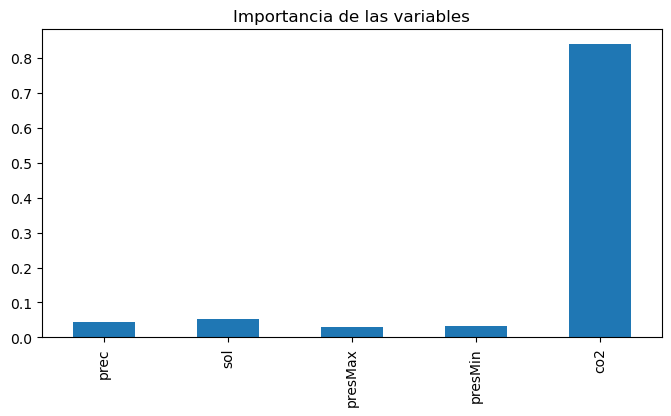

In [15]:
forest_importances.plot.bar(figsize=(8, 4)).set_title('Importancia de las variables');

Al tener temporalidad anual la variable más importante para definit 'tmed' 'co2' seguida, aunque muy de lejos, por 'sol'.

División en train y test

In [16]:
# Biblioteca para dividir en trin y test
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 16)
print(f'''Tamaño de los conjuntos de train y test:
- Train de X {X_train.shape}
- Test de X {X_test.shape}
- Train de y {y_train.shape}
- Test de y {y_test.shape}''')

Tamaño de los conjuntos de train y test:
- Train de X (52, 5)
- Test de X (14, 5)
- Train de y (52,)
- Test de y (14,)


Definimos el modelo y lo entrenamos con las variable 'co2'.

In [18]:
# Seleccionamos las variables
X = df[['co2']]
y = df['tmed']

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Generamos las predicciones para los conjuntos de 'train' y 'test'

In [21]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

Calculamos el error Error Absoluto Medio Porcentual

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

In [23]:
mape_train = mean_absolute_percentage_error(pred_train, y_train)
mape_test = mean_absolute_percentage_error(pred_test, y_test)

print(f'''Error absoluto medio (MAPE):
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test, 5)}.
''')

if (mape_train < 0.1) & ( mape_test < 0.1):
    print('''La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   ''')
else:
    print('Debemos revisar el modelo.')

Error absoluto medio (MAPE):
- En el conjunto de "train" las predicciones se desvían en un 0.01623.
- En el conjunto de "test" las predicciones se desvían en un 0.01962.

La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   


Comprobamos la distribución de los errores

In [24]:
def plot_errores(dataset):
  plt.subplots(figsize=(10,2))
  plt.title('Distribución de errores')
  plt.ylabel('Cantidad de predcciones')
  plt.xlabel('Error')
  plt.hist(dataset['error'], bins=np.linspace(-20, 20, num=41, dtype=int));
  plt.show()

- Train

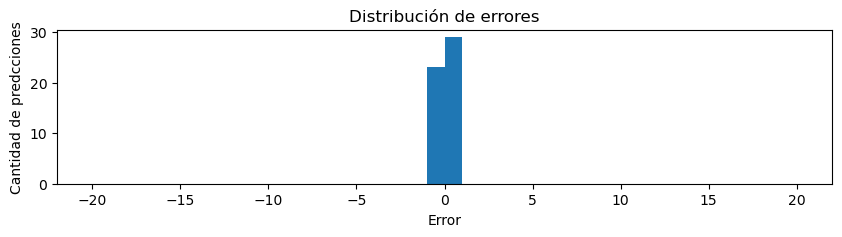

In [25]:
X_train['error'] = y_train - pred_train
plot_errores(X_train)

- Test

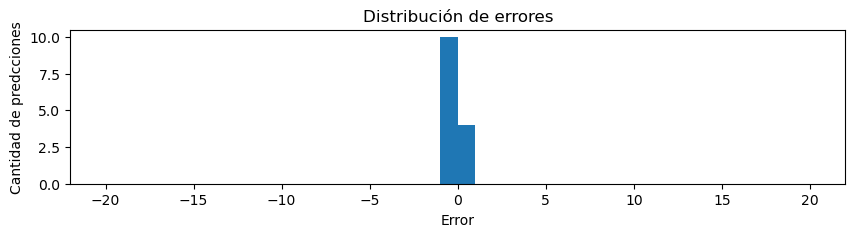

In [26]:
X_test['error'] = y_test - pred_test
plot_errores(X_test)

Comprobamos que los errores se distribuyen alrededor de 0, por lo que entendemos que la predicción del modelo es precisa.

### Modelo SVM regressor:

Definimos ahora el modelo SVR

In [27]:
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X, y, test_size = 0.2 ,random_state = 16)
print(f'''Tamaño de los conjuntos de train y test:
- Train de X {X_train.shape}
- Test de X {X_test.shape}
- Train de y {y_train.shape}
- Test de y {y_test.shape}''')

Tamaño de los conjuntos de train y test:
- Train de X (52, 6)
- Test de X (14, 6)
- Train de y (52,)
- Test de y (14,)


In [28]:
from sklearn.svm import SVR

In [29]:
svr = SVR()

Entrenamos el modelo con las mismas variables

In [30]:
svr.fit(X_train_svr, y_train_svr)

SVR()

Generamos las predicciones

In [31]:
pred_train_svr = svr.predict(X_train_svr)
pred_test_svr = svr.predict(X_test_svr)

In [32]:
mape_train_svr = mean_absolute_percentage_error(pred_train_svr, y_train_svr)
mape_test_svr = mean_absolute_percentage_error(pred_test_svr, y_test_svr)

print(f'''Error absoluto medio (MAPE) con aprendizaje automático:
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train_svr, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test_svr, 5)}.
''')

if (mape_train_svr < 0.1) & ( mape_test_svr < 0.1):
    print('''La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   ''')
else:
    print('Debemos revisar el modelo.')

Error absoluto medio (MAPE) con aprendizaje automático:
- En el conjunto de "train" las predicciones se desvían en un 0.01438.
- En el conjunto de "test" las predicciones se desvían en un 0.01995.

La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   


El conjunto entrenado con 'svr', aprendizaje automático, ha conseguido un resultado ligeramente peor sobre el conjunto de 'train' y un resultado ligeramente mejor sobre el conjunto de 'test'.

Comprobamos la distribución de los errores

- Train

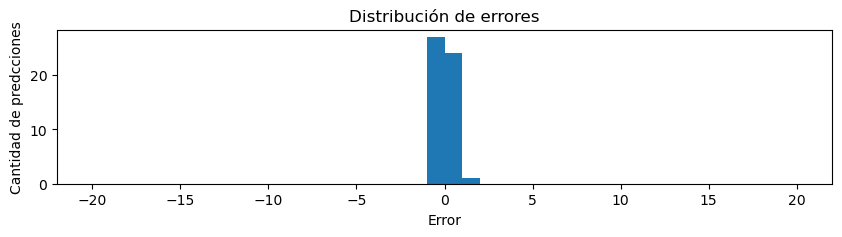

In [33]:
X_train_svr["error"] = pred_train_svr - y_train_svr
plot_errores(X_train_svr)

- Test

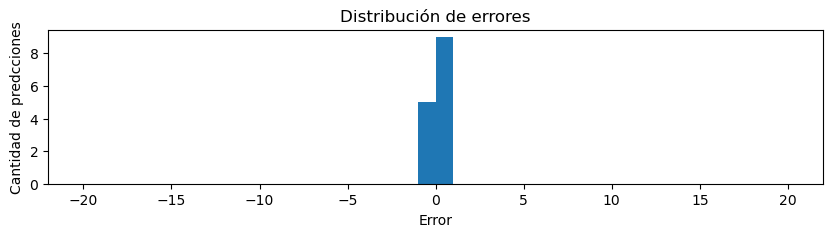

In [34]:
X_test_svr["error"] = pred_test_svr - y_test_svr
plot_errores(X_test_svr)

Nuevamente, comprobamos que los errores se distribuyen alrededor de 0, por lo que entendemos que la predicción del modelo es precisa.

#### Modelo de red neuronal

In [35]:
X_train_neu, X_test_neu, y_train_neu, y_test_neu = train_test_split(X, y, test_size = 0.2 ,random_state = 16)

Estandarizamos los datos

Comprobamos que al estandarizar las variables mejoramos en la desviación de la predicción en los datos de 'train' en un 3.46% y empeoramos en los resultados de de 'test' en un 0.015%.

Son valores muy pequeñosque en 70 años afectaría a nuestras predicciones en 0.02 grados.

Por este motivo, se muesrta el código para estandarizar la variable explicativa pero no se ejecutará en este código tal y como se puede comprobar a continuación.

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train_neu)
X_test_std = std.transform(X_test_neu)

Diseñamos una red neuronal con dos capas  ocultas

In [37]:
from sklearn.neural_network import MLPRegressor

#### Gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

Vamos a probar a utilizar Gridsearch para obtener los parámetros que obtengan mejores resultados en nuestra red neuronal

In [39]:
param_grid = {
    "hidden_layer_sizes": [[6, 3],
                          [8, 4, 2],
                          [8, 4, 1],
                          [16, 8, 2],
                          [16, 8, 1],
                          [32, 16, 4],
                          [30, 10, 1]],
    "activation": ["relu"],
    "solver": ['adam', 'sgd', 'lbfgs']
}

Para ejecutar el modelo de regresión con red neuronal vamos a generar pliegues. Vamos a dividir el conjunto de entrenamiento en subconjuntos y entrenar con todos menos un subconjunto (n - 1). Luego realizaremos la predicción con el subconjunto sobrante.

Por el reducido tamaño de los datos propondremos dividir el conjunto de entrenamiento en pocos subconjunto de pliegues, por ejemplo 4.

Indicamos el el parámetro 'verbose = 10' para observar todos los resultados de todas las iteraciones generadas en 'param_grid'

In [40]:
gridsearch = GridSearchCV(MLPRegressor(random_state = 16), 
                          param_grid, 
                          cv = 4, 
                          verbose=0
                         )

In [41]:
# Entrenamiento del modelo
gridsearch.fit(X_train_neu, y_train_neu)

C:\Users\34610\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34610\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34610\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34610\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34610\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=4, estimator=MLPRegressor(random_state=16),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [[6, 3], [8, 4, 2], [8, 4, 1],
                                                [16, 8, 2], [16, 8, 1],
                                                [32, 16, 4], [30, 10, 1]],
                         'solver': ['adam', 'sgd', 'lbfgs']})

In [42]:
# Obtenermos el mejor modelo encontrado y lo guardamos
modelo = gridsearch.best_estimator_
modelo

MLPRegressor(hidden_layer_sizes=[8, 4, 2], random_state=16, solver='lbfgs')

In [43]:
train_pred_neu = gridsearch.best_estimator_.predict(X_train_neu)
test_pred_neu = gridsearch.best_estimator_.predict(X_test_neu)

In [44]:
mape_train_neu = mean_absolute_percentage_error(train_pred_neu, y_train_svr)
mape_test_neu = mean_absolute_percentage_error(test_pred_neu, y_test_svr)

print(f'''Error absoluto medio (MAPE) con una red neuronal:
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train_neu, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test_neu, 5)}.
''')

if (mape_train_neu < 0.1) & ( mape_test_neu < 0.1):
    print('''La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   ''')
else:
    print('Debemos revisar el modelo.')

Error absoluto medio (MAPE) con una red neuronal:
- En el conjunto de "train" las predicciones se desvían en un 0.01784.
- En el conjunto de "test" las predicciones se desvían en un 0.01985.

La diferencia de los errores en los conjuntos de "train" y "test" no es signiificativa.
Entendemos que nuestro modelo se ajusta bien a los datos de entrenamiento y generaliza adecuadamente en los datos desconocidos.
   


Cuando generábamos la red neuronal de fomra manual:

El modelo no acaba de converger con el algoritmo de optimización **'adam'**, por ello probamos uno más simplificado como el **'sgd'**.

Pero al final obtenemos los mejores resultados con el modelo **'lbfgs'**. Estro puede ser por el tamaño de nuestra muestra o por utilizar un método de aproximación para optimizar el modelo en lugar de el descenso por gradiente.

Cabe mencionar que el modelo **'lbfgs'** es el único modelo que no necesita aumentar el número máximo de iteraciones para converger.

In [45]:
print(f'''
Error absoluto medio (MAPE) SIN APRENDIZAJE AUTOMÁTICO:
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test, 5)}.
''')
print('_.-.' * 20)
print(f'''
Error absoluto medio (MAPE) CON APRENDIZAJE AUTOMÁTICO:
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train_svr, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test_svr, 5)}.
''')
print('_.-.' * 20)
print(f'''
Error absoluto medio (MAPE) CON RED NEURONAL:
- En el conjunto de "train" las predicciones se desvían en un {round(mape_train_neu, 5)}.
- En el conjunto de "test" las predicciones se desvían en un {round(mape_test_neu, 5)}.
''')


Error absoluto medio (MAPE) SIN APRENDIZAJE AUTOMÁTICO:
- En el conjunto de "train" las predicciones se desvían en un 0.01623.
- En el conjunto de "test" las predicciones se desvían en un 0.01962.

_.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-.

Error absoluto medio (MAPE) CON APRENDIZAJE AUTOMÁTICO:
- En el conjunto de "train" las predicciones se desvían en un 0.01438.
- En el conjunto de "test" las predicciones se desvían en un 0.01995.

_.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-._.-.

Error absoluto medio (MAPE) CON RED NEURONAL:
- En el conjunto de "train" las predicciones se desvían en un 0.01784.
- En el conjunto de "test" las predicciones se desvían en un 0.01985.



Después de enrtenar nuestro modelo con los modelos de aprendizaje sin automatizar, aprendizaje automático y redes neuronales, comprobamos que todos los modelos funcionan muy bien con nuestros datos. Aunque si hubiera que 

In [46]:
# Cargamos el DataFrame que guarda la predicción del CO2.
co_f = pd.read_csv('C:/Users/34610/Desktop/TFM/CO2/co_future.csv')

In [47]:
# Pasamos la columna 'fecha' a formato fecha
co_f['fecha'] = pd.to_datetime(co_f['fecha'])

# Seleccionamos la columna 'fecha' como índice
co_f = co_f.set_index('fecha', drop = True)

# Cambiamos la temporalidad de los datos a tipo anual
co_f = co_f.resample('A').mean()

In [48]:
# Asumiendo que co_f contiene solo la columna de CO2 para los años futuros
X_futuro = co_f[['co2']].values  # Asegúrate de que 'co2' es el nombre correcto de la columna

# Utilizar el mejor modelo del grid search para hacer predicciones
mejor_modelo = gridsearch.best_estimator_
predicciones_futuras = mejor_modelo.predict(X_futuro)

# Crear un DataFrame para las predicciones
temed_neu_f = pd.DataFrame({
    'fecha': co_f.index,
    'neu_tmed': predicciones_futuras
})

C:\Users\34610\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Importamos el fichero con las predicciones para la temperatura media del modelo de regrsión lineal simple para realizar la comparación de los resultados en 'tmed'.

In [49]:
# Importamos resultados de la regresión lineal simple
tmed_f = pd.read_csv('escenarios_futuros/valencia_tmed_future.csv')

# Pasamos a formato fecha la columna 'fecha'
temed_neu_f['fecha'] = pd.to_datetime(temed_neu_f['fecha'])
tmed_f['fecha'] = pd.to_datetime(tmed_f['fecha'])

# Unimos los DataFrames por la columna 'fecha'
temed_neu_vs_rgl = temed_neu_f.join(tmed_f['tmed'])

# Seleccionamos la columna 'fecha' como índice
temed_neu_vs_rgl = temed_neu_vs_rgl.set_index('fecha', drop = True)

In [50]:
# Generamos una columna que muestre la diferencia de la predicción
temed_neu_vs_rgl['diff'] = temed_neu_vs_rgl['neu_tmed'] - temed_neu_vs_rgl['tmed']

Comprobamos en una muestra aleatoria por cuánto difieren ambas predicciones

In [51]:
# Muestra aleatoria
temed_neu_vs_rgl.sample(20)

,neu_tmed,tmed,diff
fecha,,,
2053-12-31,21.038444,20.901206,0.137238
2092-12-31,23.033464,22.809690,0.223774
2034-12-31,20.072559,19.977217,0.095342
2037-12-31,20.224325,20.122400,0.101925
2061-12-31,21.447084,21.292121,0.154963
2058-12-31,21.293774,21.145461,0.148313
2039-12-31,20.325710,20.219388,0.106322
2023-12-31,19.490213,19.420131,0.070082
2027-12-31,19.720408,19.640341,0.080067


LLegamos a la conclusión de que, como las predicciones se basan en la evolución del CO2 y el CO2 aumenta de forma constante en el tiempo, observamos que coinciden los datos de la predicción con un modelo sencillo y otro complejo.